In [1]:
import soundfile as sf
import librosa
import numpy as np
from scipy.signal import correlate

In [ ]:
def find_delay(audio1, audio2):
    correlated = correlate(audio1, audio2, mode='full', method='auto')
    delay = np.argmax(correlated) - len(audio2) + 1
    return delay

def align_audio(audio1, audio2):
    delay = find_delay(audio1, audio2)

    if delay > 0:
        audio1 = audio1[delay:]  # Trim the start of audio1
    else:
        audio2 = audio2[-delay:]  # Trim the start of audio2

    min_length = min(len(audio1), len(audio2))
    audio1 = audio1[:min_length]
    audio2 = audio2[:min_length]

    return audio1, audio2


In [2]:
SR = 8000
original_audio_path = "/data/audio/EXP28-tel/concatenated_sweep/long_audio_0002.wav" #"/data/audio/EXP28-tel/concatenated_sweep/recordings/20250424_120531_plus0000_REee2be08ee3d288952d3eb99a7f01b037.wav"
recorded_audio_path = "/data/audio/EXP28-tel/concatenated_sweep/recordings/Call030.wav"
import json

# Path to the JSONL file
# jsonl_file_path = "/data/audio/EXP28-tel/concatenated_sweep/long_audio_0002_info.jsonl"
jsonl_file_path = "test.jsonl"


In [3]:
original_audio, sample_rate1 = librosa.load(original_audio_path, sr=SR)
recorded_audio, sample_rate2 = librosa.load(recorded_audio_path, sr=SR)
np.shape(original_audio), np.shape(recorded_audio)

((28971731,), (20983680,))

In [12]:
correlated = correlate(original_audio, recorded_audio, mode='full', method='auto')
delay = np.argmax(correlated) - len(recorded_audio) + 1

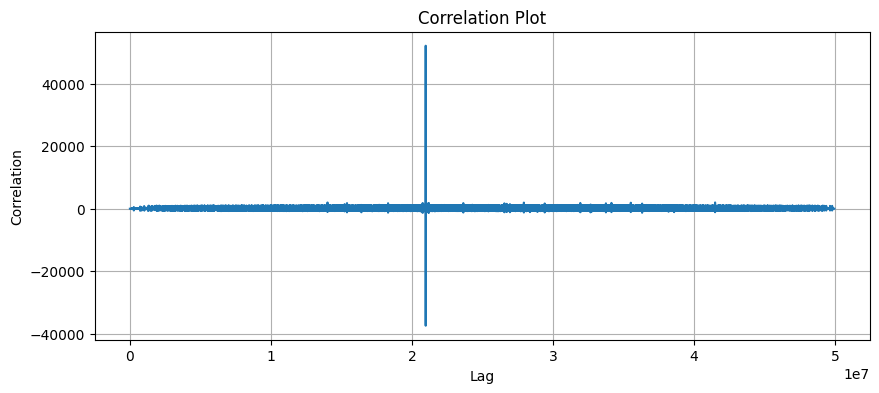

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(correlated)
plt.title("Correlation Plot")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid()
plt.show()

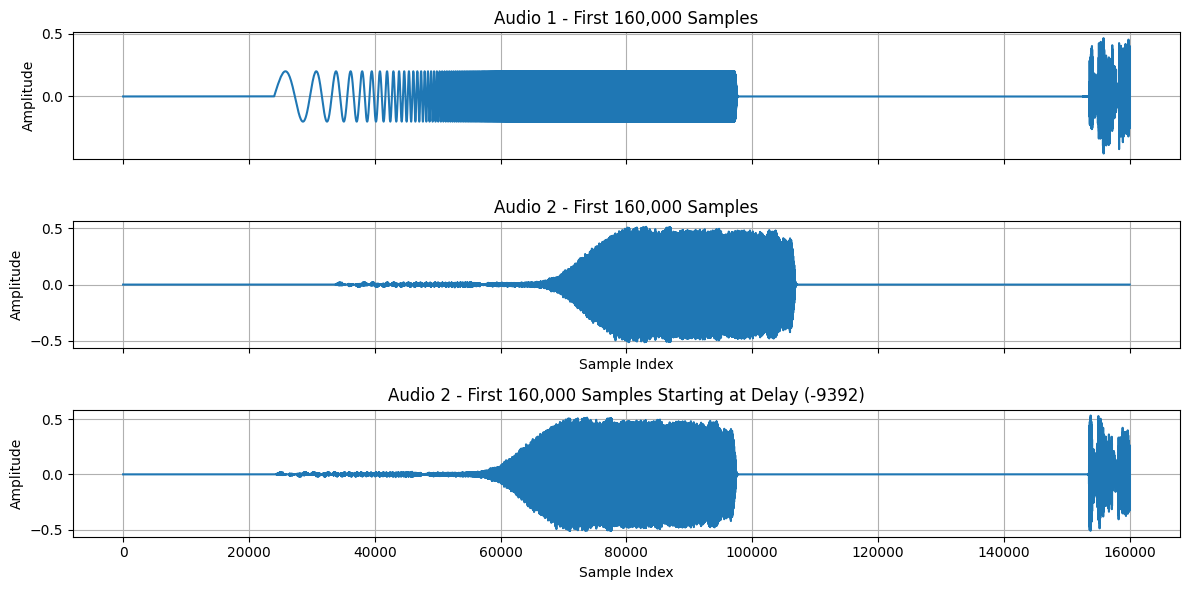

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

# Plot audio1
axs[0].plot(original_audio[:160000])
axs[0].set_title("Audio 1 - First 160,000 Samples")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

# Plot audio2
axs[1].plot(recorded_audio[:160000])
axs[1].set_title("Audio 2 - First 160,000 Samples")
axs[1].set_xlabel("Sample Index")
axs[1].set_ylabel("Amplitude")
axs[1].grid()

# Plot audio2 starting at sample "delay"
axs[2].plot(recorded_audio[-delay:-delay + 160000])
axs[2].set_title(f"Audio 2 - First 160,000 Samples Starting at Delay ({delay})")
axs[2].set_xlabel("Sample Index")
axs[2].set_ylabel("Amplitude")
axs[2].grid()

plt.tight_layout()
plt.show()

Original audio segment: 0:152000 (len: 152000)
Recorded audio chunk: 0:154000 (len: 154000)
Filename: sweep.wav, delay 154079, max corr 906.3206176757812, Start Index in Long Array: 80


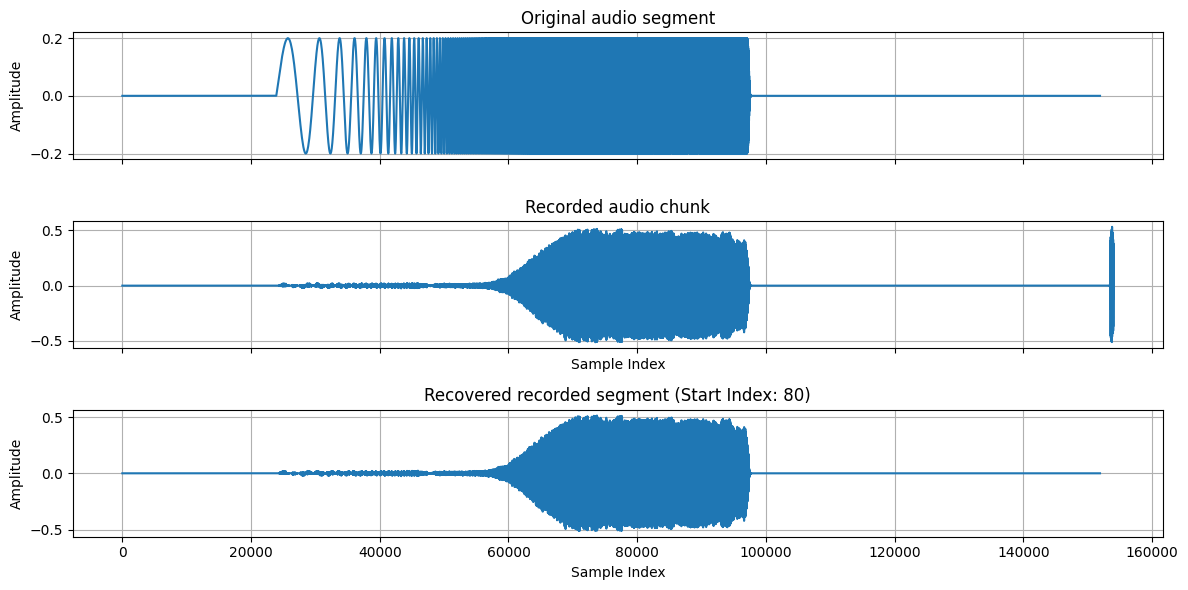

Original audio segment: 152000:170808 (len: 18808)
Recorded audio chunk: 150000:172808 (len: 22808)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.HarvardSentences/tts/elevenlabs.eleven_multilingual_v2/GiH4mY3kYGRiQxKhN980.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.297.wav, delay 20888, max corr 225.45648193359375, Start Index in Long Array: -1919


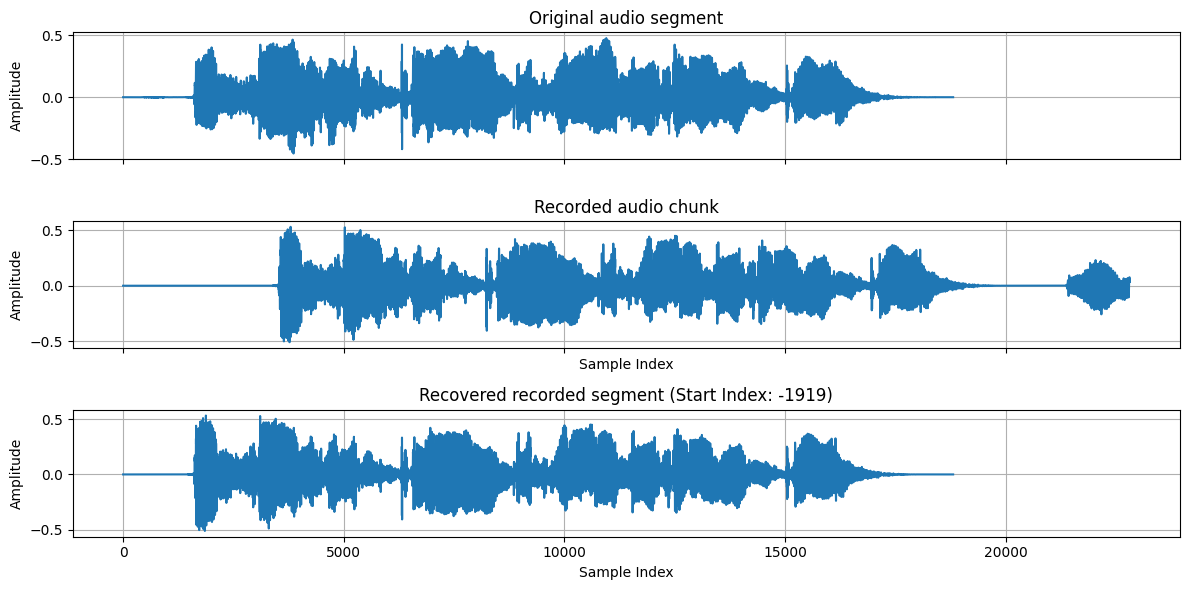

Original audio segment: 170808:180421 (len: 9613)
Recorded audio chunk: 168808:182421 (len: 13613)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.conversational/tts/elevenlabs.eleven_multilingual_v2/SAz9YHcvj6GT2YYXdXww.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.369.wav, delay 11692, max corr 21.86799430847168, Start Index in Long Array: -1920


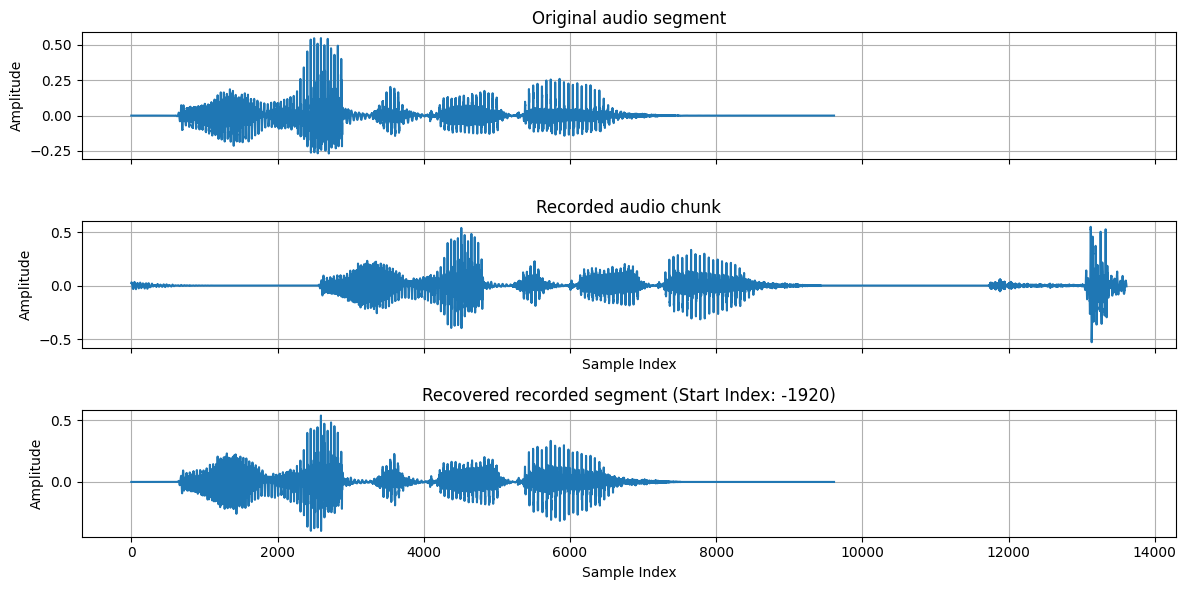

Original audio segment: 180421:196303 (len: 15882)
Recorded audio chunk: 178421:198303 (len: 19882)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.HarvardSentences/tts/elevenlabs.eleven_multilingual_v2/nn2V0hT3A36JaCyhZsiT.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.99.wav, delay 17962, max corr 180.06431579589844, Start Index in Long Array: -1919


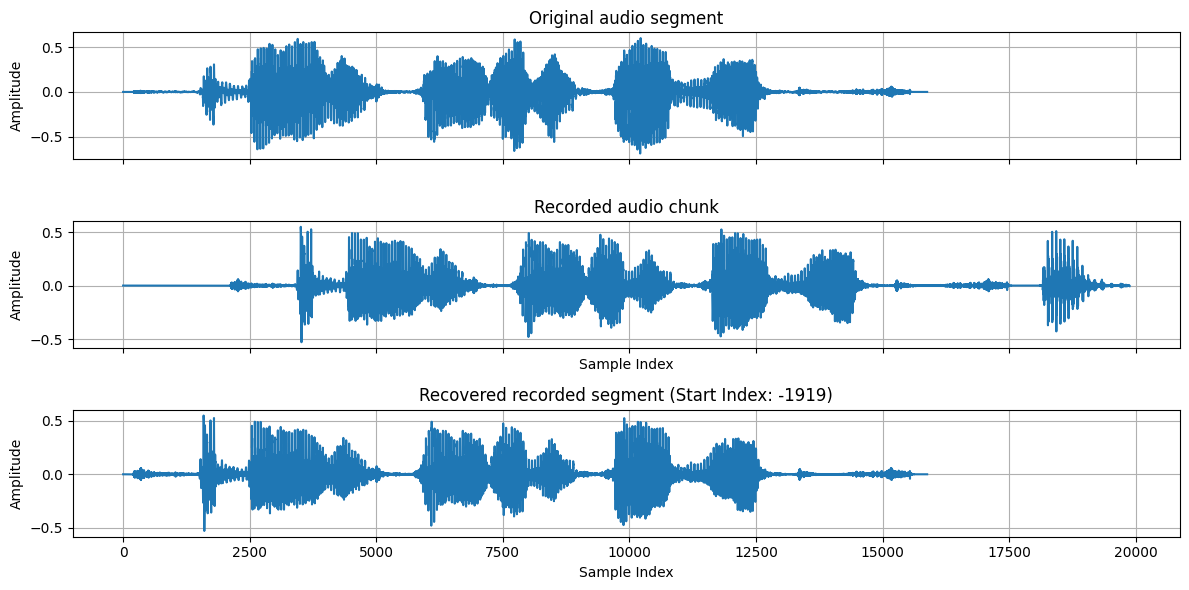

Original audio segment: 196303:220754 (len: 24451)
Recorded audio chunk: 194303:222754 (len: 28451)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.conversational/tts/elevenlabs.eleven_multilingual_v2/Yko7PKHZNXotIFUBG7I9.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.214.wav, delay 26531, max corr 239.9499053955078, Start Index in Long Array: -1919


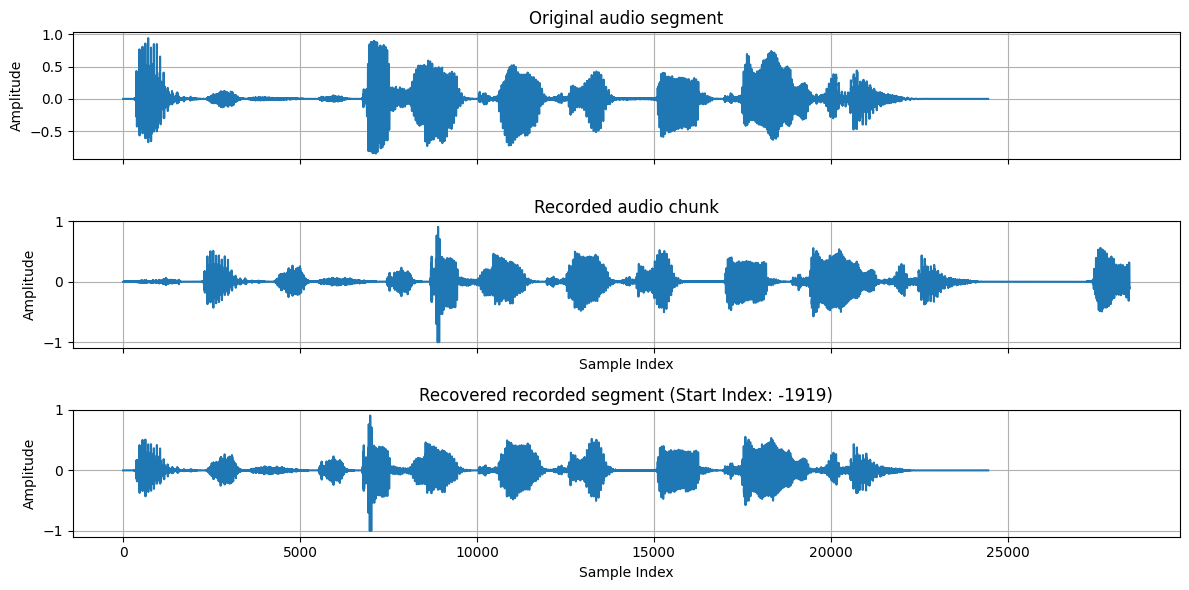

Original audio segment: 220754:240816 (len: 20062)
Recorded audio chunk: 218754:242816 (len: 24062)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.HarvardSentences/tts/elevenlabs.eleven_multilingual_v2/IKne3meq5aSn9XLyUdCD.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.541.wav, delay 22142, max corr 96.16920471191406, Start Index in Long Array: -1919


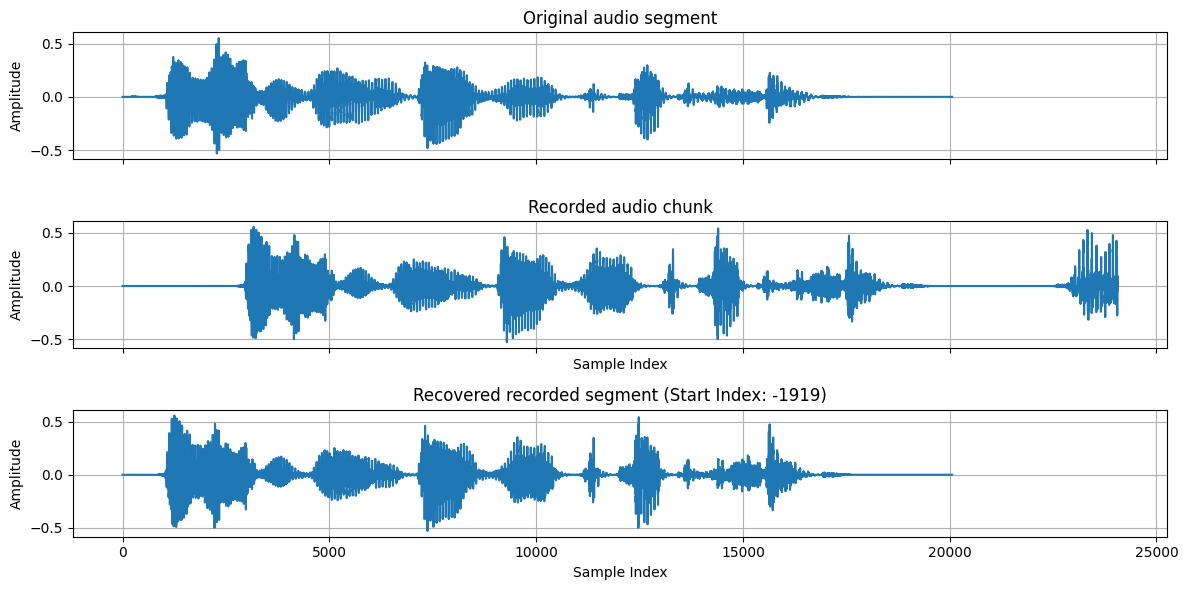

Original audio segment: 240816:308316 (len: 67500)
Recorded audio chunk: 238816:310316 (len: 71500)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.ai_casual/tts/elevenlabs.eleven_multilingual_v2/jXkeB46JcPXXUSxzn3MD.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.3.wav, delay 69531, max corr 307.60357666015625, Start Index in Long Array: -1968


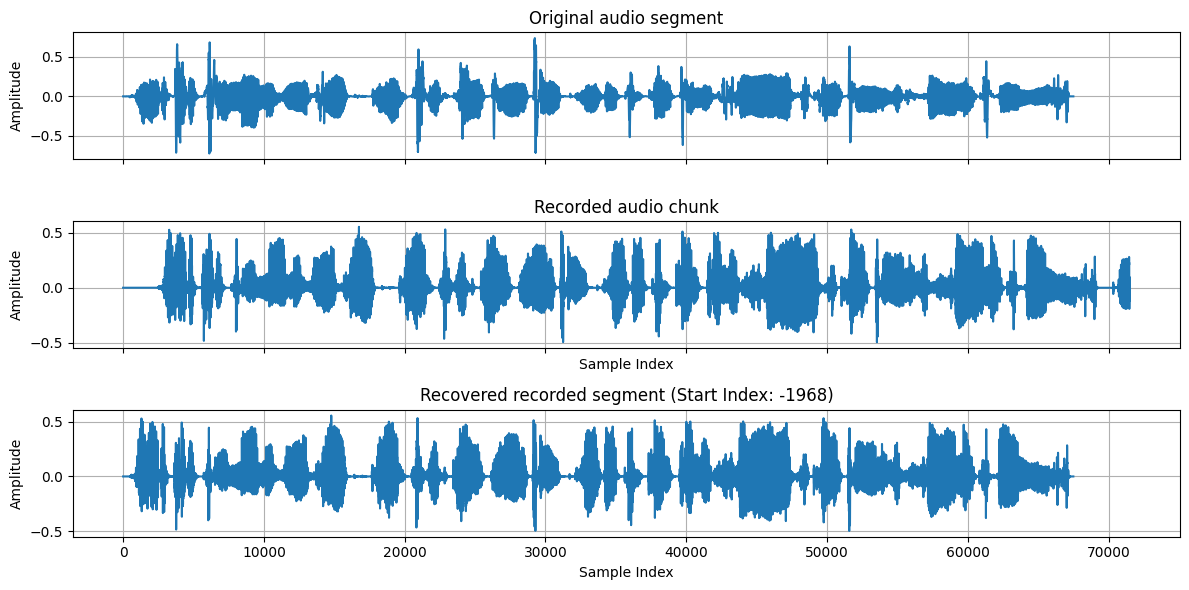

Original audio segment: 308316:346560 (len: 38244)
Recorded audio chunk: 306316:348560 (len: 42244)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.spam_blocker/tts/elevenlabs.eleven_multilingual_v2/jXkeB46JcPXXUSxzn3MD.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.135.wav, delay 40324, max corr 93.25988006591797, Start Index in Long Array: -1919


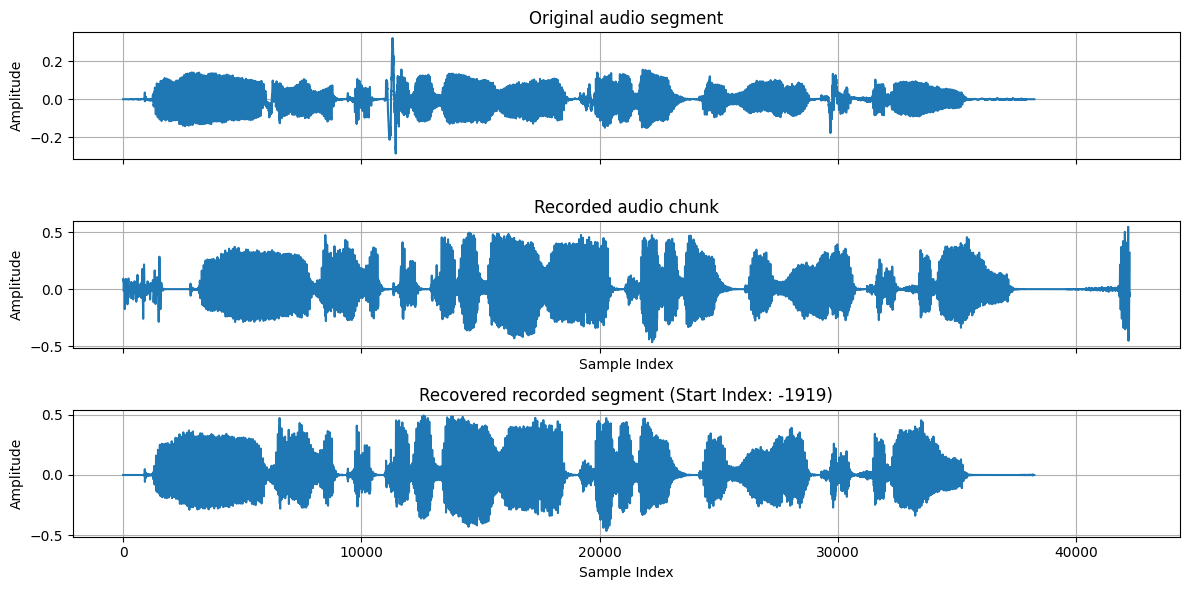

Original audio segment: 346560:359099 (len: 12539)
Recorded audio chunk: 344560:361099 (len: 16539)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.conversational/tts/elevenlabs.eleven_multilingual_v2/o5vKI35DRTnar9Y3HL23.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.350.wav, delay 14643, max corr 16.73781394958496, Start Index in Long Array: -1895


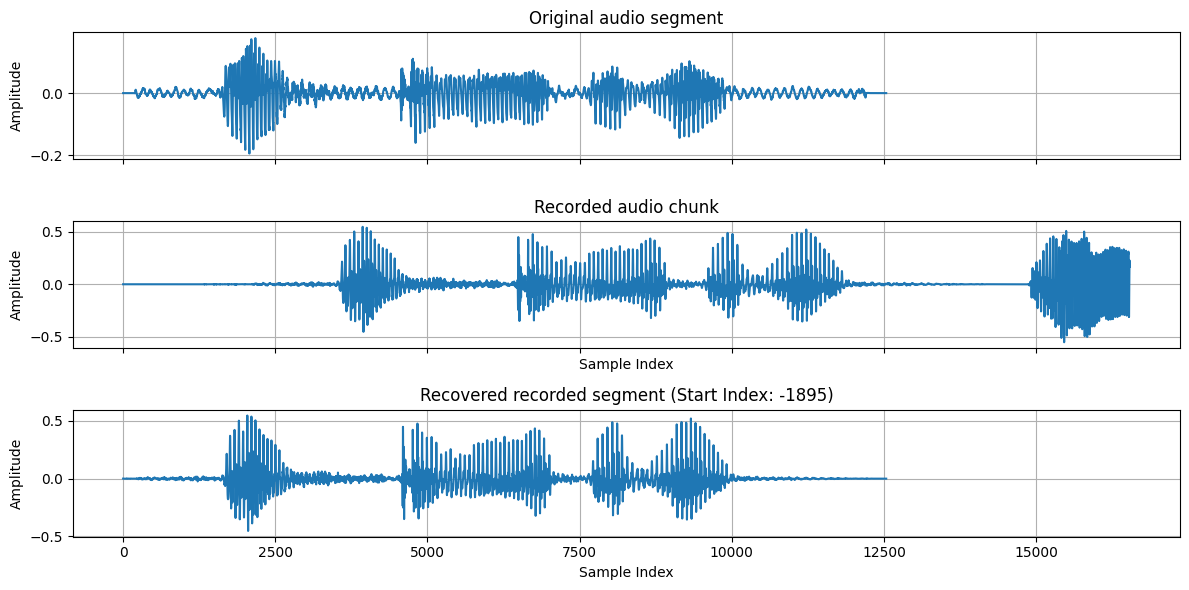

Original audio segment: 359099:379161 (len: 20062)
Recorded audio chunk: 357099:381161 (len: 24062)
Filename: /data/audio/EXP28-tel/elevenlabs/elevenlabs.HarvardSentences/tts/elevenlabs.eleven_multilingual_v2/ZQe5CZNOzWyzPSCn5a3c.TTS.elevenlabs.eleven_multilingual_v2-sta50-sim80.en.383.wav, delay 22142, max corr 63.89207458496094, Start Index in Long Array: -1919


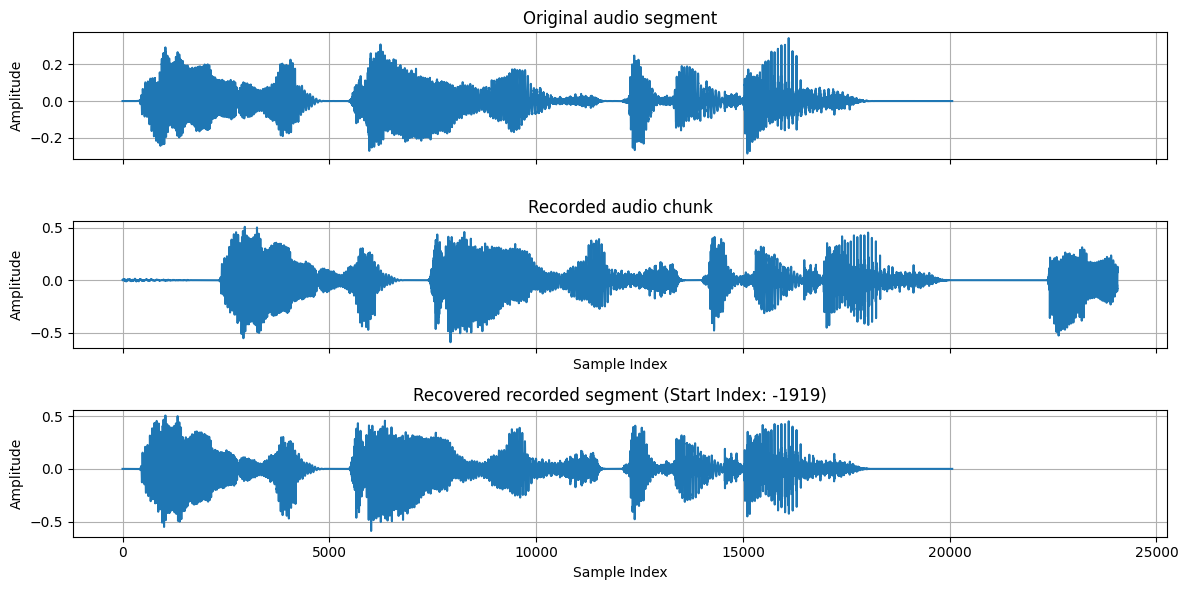

In [ ]:
MAX_LAG = int(0.25 * SR) # fine-tune lag range 
DO_PLOTS = False
recorded_audio_adjusted = recorded_audio[-delay:]

output_dir = "/data/audio/EXP28-tel/concatenated_sweep/recordings/"

# Iterate through each line in the JSONL file
with open(jsonl_file_path, 'r') as file:
    n = 0
    for line in file:
        # Parse the JSON object
        data = json.loads(line)
        start = int(data["start"]*SR)
        end = int(data["end"]*SR)
        # Load the long audio file
                
        original_audio_segment = original_audio[start:end]

        recorded_audio_start = np.max([0, start - MAX_LAG])
        recorded_audio_end = np.min([len(recorded_audio), end + MAX_LAG])
        recorded_audio_chunk = recorded_audio_adjusted[recorded_audio_start:recorded_audio_end]
        
        print(f"Original audio segment: {start}:{end} (len: {len(original_audio_segment)})")
        print(f"Recorded audio chunk: {recorded_audio_start}:{recorded_audio_end} (len: {len(recorded_audio_chunk)})")
        
        # Compute the cross-correlation with the long array
        cross_corr = correlate(original_audio_segment, recorded_audio_chunk, mode='full', method='auto')
        
        # Find the index of the maximum correlation
        max_corr_index = np.argmax(cross_corr)
        
        # Calculate the start index in the long array
        delay = max_corr_index - len(recorded_audio_chunk) + 1
        
        if delay > 0:
            original_audio_segment = original_audio_segment[delay:]  # Trim the start of audio1
        else:
            recorded_audio_chunk = recorded_audio_chunk[-delay:]
        
        
        print(f"Filename: {data['filename']}, delay {max_corr_index}, max corr {cross_corr[max_corr_index]}, Start Index in Long Array: {delay}")
        
        
        if DO_PLOTS:
            fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

            # Plot audio1
            axs[0].plot(original_audio_segment)
            axs[0].set_title("Original audio segment")
            axs[0].set_ylabel("Amplitude")
            axs[0].grid()

            # Plot audio2
            axs[1].plot(recorded_audio_adjusted[recorded_audio_start:recorded_audio_end])
            axs[1].set_title("Recorded audio chunk")
            axs[1].set_xlabel("Sample Index")
            axs[1].set_ylabel("Amplitude")
            axs[1].grid()

            # Plot recovered recorded segment
            axs[2].plot(recorded_audio_chunk[:len(original_audio_segment)])
            axs[2].set_title(f"Recovered recorded segment (Start Index: {delay})")
            axs[2].set_xlabel("Sample Index")
            axs[2].set_ylabel("Amplitude")
            axs[2].grid()

            plt.tight_layout()
            plt.show()
        
        n += 1
        if n > 10:
            break